# Project 1: Higgs Boson Detection

In [52]:
import numpy as np
import csv
from regression_tools import * 
import matplotlib.pyplot as plt

## Loading files

In [ ]:
with open('test.csv') as csv_file_test:
    test_reader=csv.reader(csv_file_test,delimiter=',')
    test_list=[]
    for row in test_reader:
        test_list.append(row)
    y_test=[]
    x_test_list=[]
    for test_row in test_list:
        y_test.append(test_row[1])
        test_row.pop(1)
        x_test_list.append(test_row)
    x_test=np.array(x_test_list)

In [ ]:
x_test.shape

In [ ]:
def load_data(train_path,test_path):
    train_reader=np.genfromtxt(train_path,delimiter=',',missing_values=-999)
    train_list=[]
    for row in train_reader:
        train_list.append(row)
    y_train_bool=[]
    x_train_l=[]
    for train_row in train_list:
        train_row=np.ndarray.tolist(train_row)
        y_train_bool.append(train_row[1]=='b')
        train_row.pop(1)
        x_train_l.append(train_row)
    Data_structure_X=x_train_l[0]
    x_train_l.pop(0)
    y_train_bool.pop(0)
    x_train=np.array(x_train_l)
    y_train=np.array(y_train_bool)
    
    
    test_reader=np.genfromtxt(test_path,delimiter=',')
    test_list=[]
    for row in test_reader:
        test_list.append(row)
    #y_test_l=[]
    x_test_l=[]
    for test_row in test_list:
        test_row=np.ndarray.tolist(test_row)
        #y_test_l.append(test_row[1])
        test_row.pop(1)
        x_test_l.append(test_row)
    x_test_l.pop(0)
    #y_test_l.pop(0)
    #y_test_bool=[y_test_l[:]==a]
    x_test=np.array(x_test_l)
    #y_test=np.array(y_test_bool)
    return x_train,y_train,x_test,Data_structure_X
        

In [ ]:
train_reader=np.genfromtxt('train.csv',delimiter=',',dtype=None,skip_header=1)
train_reader=np.ndarray.tolist(train_reader)


In [ ]:
type(train_reader)

In [ ]:
a=np.array(train_reader)[:,2:]

In [ ]:
b=a.astype(np.float)

In [ ]:
b

In [ ]:
dt=np.dtype('float,object'+30*',float')
xar=np.array(train_reader,dtype=dt)

In [84]:
def load_data(train_path,test_path):
    train_reader=np.genfromtxt(train_path,delimiter=',',skip_header=1,converters={1:lambda s: float(0) if s==b'b' else float(1)})
    y_train=train_reader[:,1]
    x_train=train_reader[:,2:]
    test_reader=np.genfromtxt(test_path,delimiter=',',skip_header=1)
    x_test=test_reader[:,2:]
    ids_test=test_reader[:,0]
    return x_train,y_train,x_test,ids_test

In [86]:
 x_train,y_train,x_test,ids_test=load_data('train.csv','test.csv')

In [ ]:
x_train

In [4]:
# to do: implement cross validation
results=[]
for j in range(1,12):
    phi_train=build_polinomial(x_train,j,nmc_tr)
    loss,w=least_squares(y_train,phi_train)
    result=(y_train==(phi_train.dot(w)>0.5)).sum()/y_train.shape[0]
    results.append(result)
plt.figure
plt.plot(range(1,12),results)
plt.xlabel('degree')
plt.ylabel('train accuracy')
plt.show()

NameError: name 'build_polinomial' is not defined

In [ ]:
plt.show()

In [34]:
def nan_converter(x,nm=-999,direction=True):
    """convert the not measured elements of the matrix in nan, 
    if direction=False the opposite conversion is made"""
    if direction:
        inds=np.where(x[:,:]==nm)
        x[inds]=np.nan
    else:
        inds=np.where(np.isnan(x))
        x[inds]=nm
    return x
        

In [35]:
def find_cluster(x_bool):
    v_bool=x_bool.sum(0)
    nb_cluster=0
    index_clusters=[]
    while np.max(v_bool)>0:
        index_clusters.append(np.argmax(v_bool))
        nb_cluster+=1
        v_bool=v_bool*(v_bool[:]!=np.max(v_bool))
    return nb_cluster, index_clusters

In [36]:
def cleaning_function(x,nm=-999,add_feat=True):
    # nm= not_measured
    x_bool=x[:,:]==nm
    nb_cluster,index_clusters=find_cluster(x_bool)
    if add_feat:
        v=x[:,index_clusters]!=nm
        x=np.concatenate((x,v,(np.prod(v,axis=1)).reshape(-1,1)),axis=1)
    inds=np.where(x_bool)
    x[inds]=np.nan
    col_mean=np.nanmean(x,axis=0)
    x[inds]=np.take(col_mean,inds[1])
    return x,nb_cluster

In [68]:
def build_polinomial(x,degree,not_poly_features=0,nm=-999):
    """create polynomial features until specified degree. It doesn't 
    compute the power of the last n columns of the metrix, n specified in 
    not_poly_features"""
    x=nan_converter(x,nm=nm,direction=True)
    phi_list=[np.ones(x.shape[0]).reshape(-1,1)]
    # is it possible to avoid the loop?
    for i in range(1,degree+1):
        phi_list.append(np.power(x[:,0:x.shape[1]-not_poly_features],i))
    if not_poly_features>0:
        phi_list.append(x[:,x.shape[1]-not_poly_features:])
    phi=np.concatenate(phi_list,axis=1)
    phi=nan_converter(phi,nm=nm,direction=False)
    return phi

In [38]:
def norm_data(x,not_norm_features=0):
    x_to_norm=x[:,1:x.shape[1]-not_norm_features]
    means=np.mean(x_to_norm,axis=0)
    sds=np.std(x_to_norm,axis=0)
    x_to_norm=(x_to_norm-means.reshape(1,-1))/sds.reshape(1,-1)
    x[:,0:x.shape[1]-not_norm_features]=x_to_norm
    return x

In [136]:
def features_augmentation(relevant_columns,not_augm_features=0):
    num_col=relevant_columns.shape[1]-not_augm_features
    new_col=[]
    for i in range(num_col):
        for j in range(i+1,num_col):
            new_col.append(relevant_columns[:,i]*relevant_columns[:,j])
            
    
    new_col=np.array(new_col)
    if num_col==2:
        new_col=new_col.reshape(-1,1)
    if not_augm_features==0:
        new_col=np.concatenate((relevant_columns,new_col),axis=1)
    else:
        new_col=np.concatenate((relevant_columns[:,0:num_col],new_col,
                                relevant_columns[:,num_col:]),axis=1)
    return new_col,num_col

In [135]:
a=np.ones((3,3))
b=features_augmentation(a,1)
print(b)

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


In [ ]:
#x_train,nmc_tr=cleaning_function(x_train,-999)
#x_test,nmc_te=cleaning_function(x_test,-999)
# nmc= nb of not measured column, i.e. columns where 
#it is present at least one not measured element
#phi_train=build_polinomial(x_train,4,nmc_tr)

In [ ]:
print(phi_train[3])

In [9]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [46]:
def LOO_cross_validation(y, phi, k_indices, k, lambda_, degree, nmc_tr):
    """return the loss of ridge/linear regression."""
    """Probabilmente conviene implementare una per la regressione normale, in modo da capire 
    quale sia il grado massimo oltre il quale non ha senso andare e poi lavorare con lambda 
    per capire come eliminare feature"""
    
    
    # Get k'th subgroup in test, others in train    
    train_indices = np.delete(k_indices , k , 0).reshape((k_indices.shape[0]-1) * k_indices.shape[1])
    x_test = phi[k_indices[k],:]
    x_train = phi[train_indices,:]
    y_test = y[k_indices[k]]
    y_train = y[train_indices]
    
    # Form data with polynomial degree
    tx_train = build_polinomial(x_train, degree, nmc_tr+1)
    tx_test = build_polinomial(x_test, degree, nmc_tr+1)
    #print(tx_test.shape)
    #print(tx_train.shape)
    #print(y_train.shape)
    # Ridge regression / Linear regression
    if lambda_!=0:
        loss , w = ridge_regression(y_train, tx_train, lambda_)
    else:
        loss , w = least_squares(y_train,tx_train)
        
    # I think it is useless. DF
    
    #print('REGRESSION DONE')
    #print(y_test.shape)
    #print(w.shape)
    
    # Calculate results
    result=(y_test==(tx_test.dot(w)>0.5)).sum()/y_test.shape[0]
    #print('RESULT CALCULATED')
    return result

In [70]:
#def cross_validation_degree():
def cross_validation_demo(y_train,x_train,degrees,k_fold,lambdas,seed):

    # split data in k fold
    k_indices = build_k_indices(y_train, k_fold, seed)


    # Clean data
    x_train_cleaned,nmc_tr=cleaning_function(x_train,-999)

    # cross validation
    cost_te=np.zeros((lambdas.size,degrees.size))
    for ind_lamb,lambda_ in enumerate(lambdas):
        print(lambda_)
        if lambda_!=0:
            x_train_cleaned=norm_data(x_train_cleaned,not_norm_features=nmc_tr+1)
        for ind_deg, degree_ in enumerate(degrees):
            #print('DEGREE IS: ')
            #print(degree_)
            loss_te = np.zeros(k_fold)
            for k in range (k_fold):
                #print('K CONSIDERED IS: ')
                #print(k)
                result = LOO_cross_validation(y_train, x_train_cleaned, k_indices, k , lambda_, degree_, nmc_tr)
                loss_te[k]= result

            cost_te[ind_lamb,ind_deg]=loss_te.mean()
    return cost_te


    #cross_validation_degree()

In [71]:
# Plot the results  
def plot_cross_validation(lambdas,cost_te,degrees):
    plt.figure
    string=[]
    for s in range(lambdas.size):
        plt.plot(degrees,cost_te[s])
        string.append(str(lambdas[s]))
    plt.xlabel('degree')
    plt.ylabel('train accuracy')
    plt.legend(string)
    plt.show()

In [75]:
def find_the_maximum(matrix):
    max_col=np.max(matrix,axis=0)
    max_col_ind=np.max(np.argmax(max_col))
    max_matrix=np.max(max_col)
    max_row_ind=np.min(np.argmax(matrix[:,max_col_ind]))
    return max_matrix,[max_row_ind,max_col_ind] 

In [109]:
def create_csv_submission(ids, y_pred, name):
    """
    Creates an output file in csv format for submission to kaggle
    Arguments: ids (event ids associated with each prediction)
               y_pred (predicted class labels)
               name (string name of .csv output file to be created)
    """
    with open(name, 'w') as csvfile:
        fieldnames = ['Id', 'Prediction']
        writer = csv.DictWriter(csvfile, delimiter=",", fieldnames=fieldnames)
        writer.writeheader()
        for r1, r2 in zip(ids, y_pred):
            writer.writerow({'Id':int(r1),'Prediction':int(r2)})

5
1e-09
1e-07
1e-05
0.001
0.1


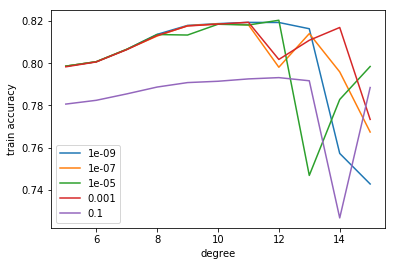

best degree is 12
best lambda is 1e-05


In [78]:
x_train,y_train,x_test,ids_test=load_data('train.csv','test.csv')
seed = 1
degrees = np.arange(5,16)
k_fold = 4
# To use ridge regression
lambdas = np.logspace(-9,-1,num=5)
print(lambdas.size)
cost_te=cross_validation_demo(y_train,x_train,degrees,k_fold,lambdas,seed)
plot_cross_validation(lambdas,cost_te,degrees)
_,best_param_ind=find_the_maximum(cost_te)
print('best degree is '+str(degrees[best_param_ind[1]]))
print('best lambda is '+str(lambdas[best_param_ind[0]]))


In [110]:
# continuation of the previous script
x_train_cleaned,nmc_tr=cleaning_function(x_train,-999)
x_train_cleaned=norm_data(x_train_cleaned,not_norm_features=nmc_tr+1)
phi_tr=build_polinomial(x_train_cleaned,degree=degrees[best_param_ind[1]],not_poly_features=nmc_tr+1)
loss,w=ridge_regression(y_train,phi_tr,lambdas[best_param_ind[0]])
x_test_cleaned,nmc_te=cleaning_function(x_test,-999)
x_test_cleaned=norm_data(x_test_cleaned,not_norm_features=nmc_te+1)
phi_te=build_polinomial(x_test_cleaned,degree=degrees[best_param_ind[1]],not_poly_features=nmc_te+1)
y_test=phi_te.dot(w)
y_pred=[]
for i in range(y_test.shape[0]):
    if y_test[i]>0.5:
        y_pred.append(1)
    else:
        y_pred.append(-1)
        #b=-1
        
create_csv_submission(ids_test, y_pred, 'submission.csv')

In [97]:
print(y_test.shape[0])

568238


In [83]:
print(ids_test)

[     nan  350000.  350001. ...,  918235.  918236.  918237.]


In [ ]:
? np.genfromtxt()

In [ ]:
np.nan

In [ ]:
? np.mean

In [51]:
? np.argmax

In [33]:
a=np.array([1,2,3,4,5])
b=np.concatenate([a.reshape(-1,1),a.reshape(-1,1)],axis=1)
print(b,a[0:1])

[[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]] [1]


TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('<U5') dtype('<U5') dtype('<U5')

In [100]:
? np.array

In [106]:
print(str('b'))

b
